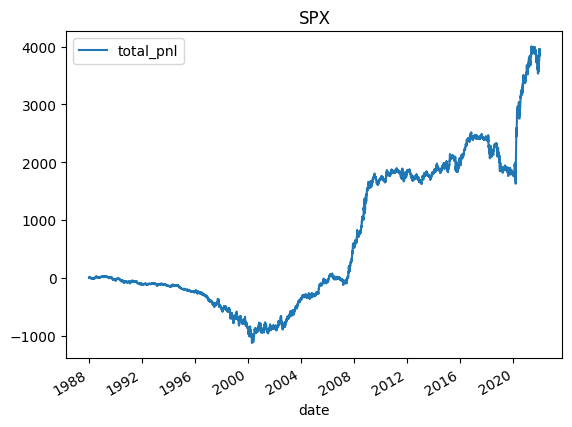

In [1]:
#Entry:  If the previous day's closing candle was positive, sell at the next day's open; 
#        and vice versa. If candle was unchanged, do nothing.
#Exit:   Place closing order at EOD.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ivolatility as ivol
from auth import initializeIvolAuthentication

initializeIvolAuthentication()
#______________________________________________________________________________
#Test trading strategy on SPX's daily data for 1980-2021.

getMarketData = ivol.setMethod('/equities/eod/stock-prices')
marketData = getMarketData(symbol='SPX', from_='1980-01-01', to='2021-12-31')

marketData['date'] = pd.to_datetime(marketData['date'])
marketData = marketData.sort_values(by='date')

pnl_df = pd.DataFrame(columns=['date', 'day_pnl', 'total_pnl'])
date_col = marketData.columns.get_loc('date')
open_col = marketData.columns.get_loc('open')
close_col = marketData.columns.get_loc('close')

pnl = 0
loc = 0
for i in range(marketData.shape[0]-1):
  currentTrade = -np.sign(marketData.iat[i, close_col] - marketData.iat[i, open_col]) * marketData.iat[i+1, open_col]
  if currentTrade == 0:
    continue
  currentTrade = np.sign(currentTrade)*marketData.iat[i+1, close_col] - currentTrade
  pnl += currentTrade
  pnl_df.loc[loc] = [marketData.iat[i+1, date_col], currentTrade, pnl]
  loc += 1

pnl_df.plot(title='SPX', x='date', y='total_pnl', kind='line')
plt.show()